# Notes:

You'll also need to use this line to see plots in the notebook: 


`
%matplotlib inline
`


That line is only for jupyter notebooks, if you are using another editor, you'll use: plt.show() at the end of all your plotting commands to have the figure pop up in another window.

# Distribution Plots



In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data
Seaborn comes with built-in data sets!

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## distplot

The distplot shows the distribution of a univariate set of observations.

C:\Users\Abdullah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

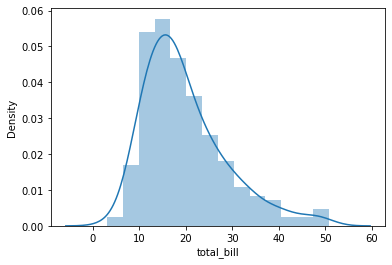

In [6]:
sns.distplot(tips['total_bill'])
# Safe to ignore warnings

To remove the kde layer and just have the histogram use:

<AxesSubplot:xlabel='total_bill'>

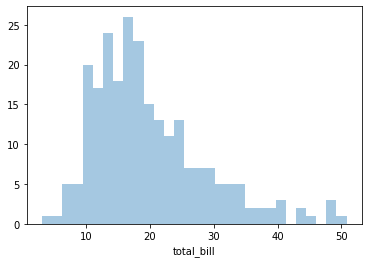

In [11]:
sns.distplot(tips['total_bill'],kde=False, bins=30)

### Setting the xlim and ylim

(0.0, 20.0)

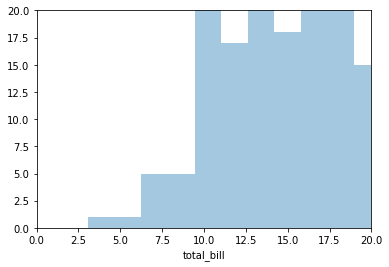

In [8]:
# setting the x limit of the plot
sns.distplot(tips['total_bill'],kde=False,bins=30)
plt.xlim(0, 20)
plt.ylim(0, 20) ### Setting the xlim and ylim)

### Rotating labels

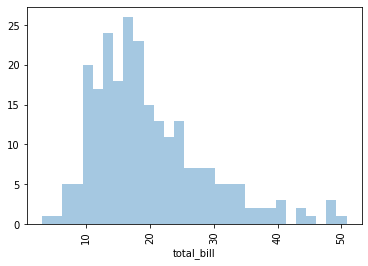

In [17]:
sns.distplot(tips['total_bill'],kde=False,bins=30)
plt.xticks(rotation = 90);

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

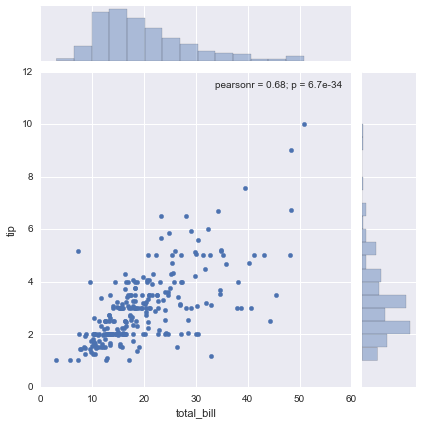

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

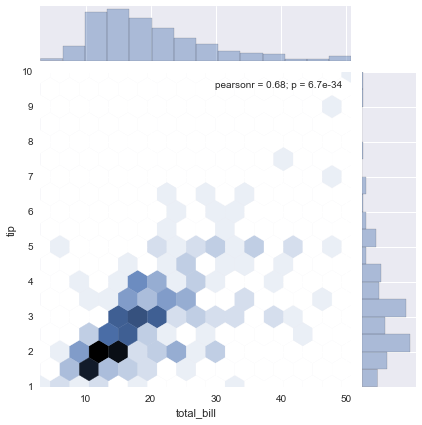

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


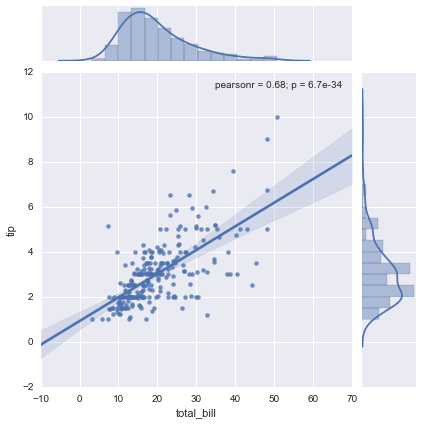

In [17]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

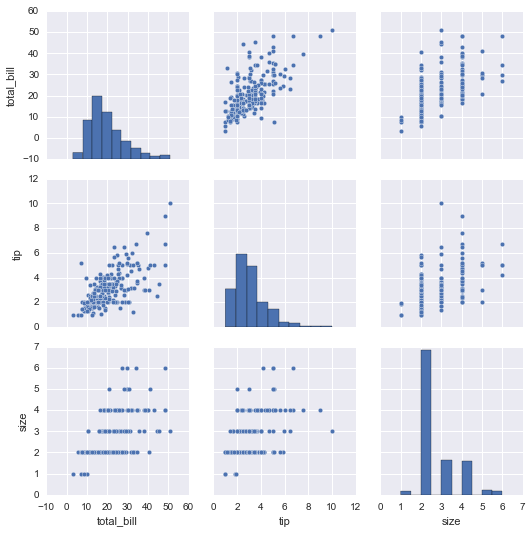

In [18]:
sns.pairplot(tips)

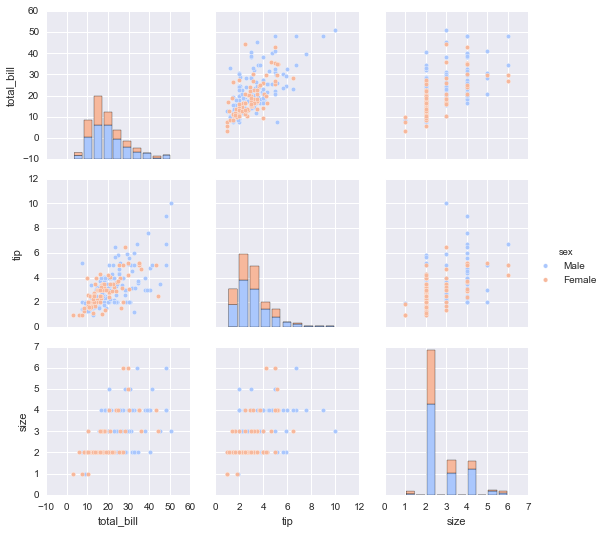

In [21]:
sns.pairplot(tips, hue='sex',palette='coolwarm')

# Categorical Data Plots


In [5]:
import seaborn as sns
%matplotlib inline

In [6]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

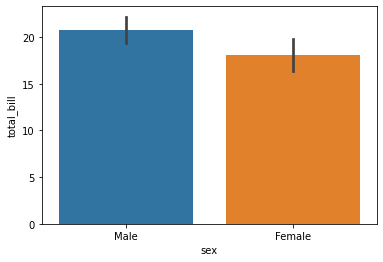

In [14]:
sns.barplot(x=tips['sex'],y=tips['total_bill'])

In [10]:
import numpy as np

You can change the estimator object to your own function, that converts a vector to a scalar:

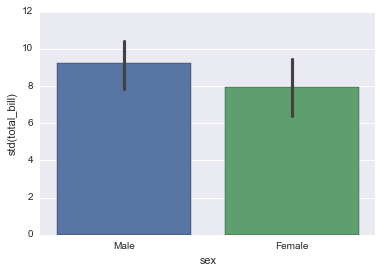

In [11]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

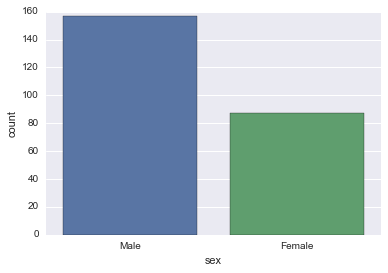

In [13]:
sns.countplot(x='sex',data=tips)

## boxplot 

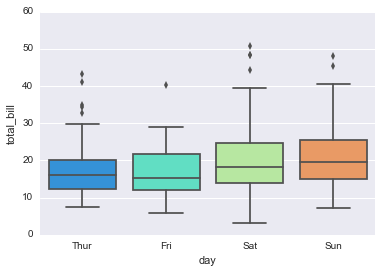

In [22]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

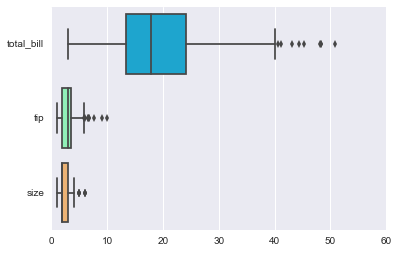

In [25]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

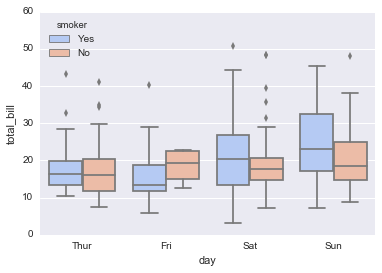

In [26]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).



In [7]:
flights = sns.load_dataset('flights')

In [10]:
tips = sns.load_dataset('tips')

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [14]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


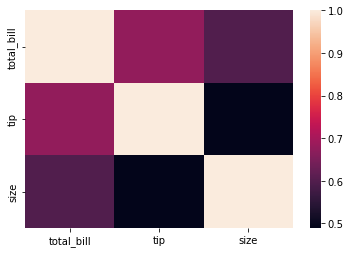

In [15]:
sns.heatmap(tips.corr());

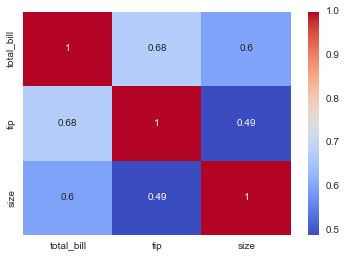

In [19]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

In [23]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


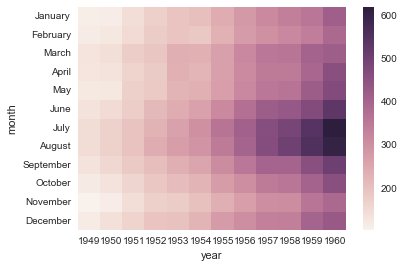

In [24]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

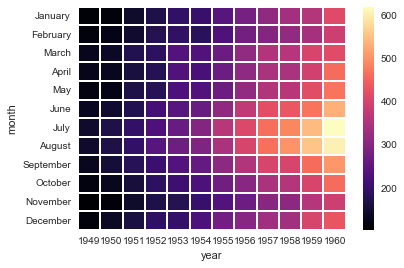

In [30]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)